In [1]:
#  Data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Acquire data
tit_data = pd.read_csv('/notebooks/Udacity/titanic_survival_exploration/titanic_data.csv')

In [3]:
# Analyze by describing data
tit_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### What category does each column falls into?

In [4]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categorical: Survived, Sex, Cabin, Embarked
Numerical: Age, Fare,
Discrete: SibSp, Parch
Odinal: Pclass


### Which features contain blank , null or empty values?These feature s will then need  correction

In [5]:
tit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 From above we could see that cabin, age and embarked features contain a number of null values

### Analyze by pivoting features

Pivoting features against each other. Suitable for categrical, ordinal or discrete type

In [6]:
tit_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
tit_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
tit_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Analyze by visualizing data

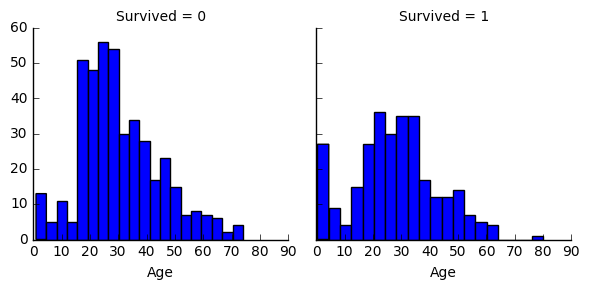

In [9]:
g = sn.FacetGrid(tit_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlating numerical and ordinal features

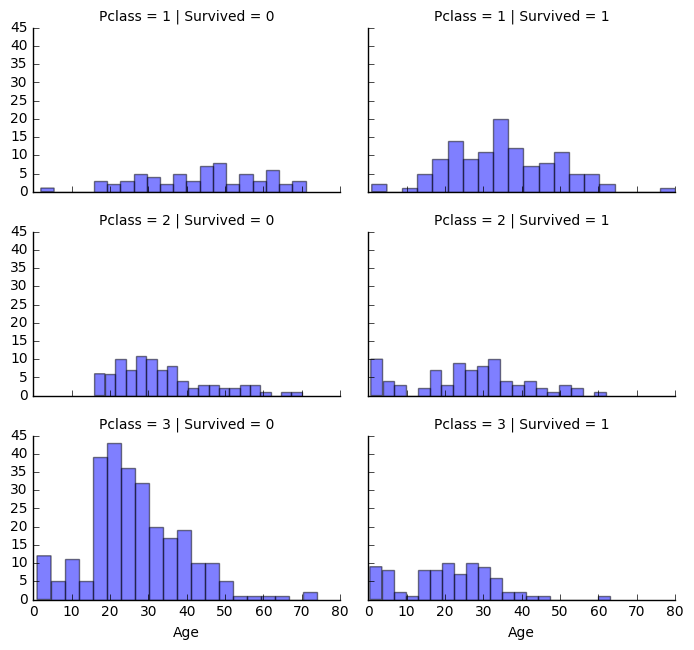

In [10]:
grid = sn.FacetGrid(tit_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)

### Correlating categorical features

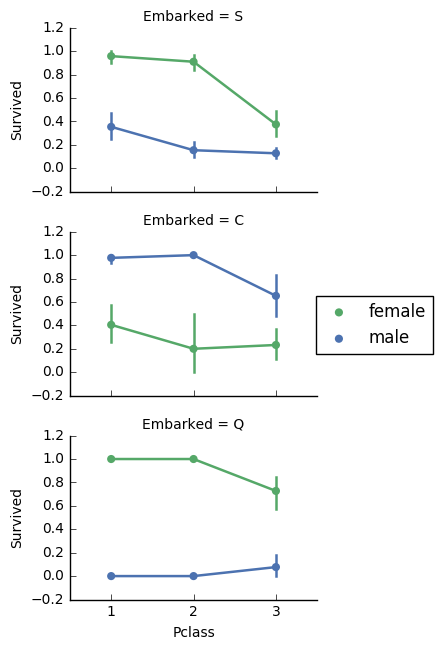

In [11]:
grid=sn.FacetGrid(tit_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sn.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Wrangle data

#### Correcting by dropping features

In [12]:
tit_data = tit_data.drop(['Ticket', 'Cabin'], axis=1)

#### Creating new features extracting from existing

In [13]:
tit_data ['Title'] = tit_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(tit_data['Title'], tit_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
# We can replace many titles with a more common name or classify them as Rare:
tit_data['Title'] = tit_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
tit_data['Title'] = tit_data['Title'].replace('Mlle', 'Miss')
tit_data['Title'] = tit_data['Title'].replace('Ms', 'Miss')
tit_data['Title'] = tit_data['Title'].replace('Mme', 'Mrs')

In [15]:
tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [16]:
tit_data[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [17]:
# We can convert categorical titles to ordinal
title_mapping={"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
tit_data['Title']=tit_data['Title'].map(title_mapping)
tit_data['Title']=tit_data['Title'].fillna(0)

tit_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [18]:
# Now we could safely drop the Name feature
tit_data = tit_data.drop(['Name','PassengerId'], axis=1)

In [19]:
tit_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [20]:
# Converting a categorical feature
# For useful categorical feature, for better application it is frequently required to convert the strings to numerical values
tit_data['Sex'] = tit_data['Sex'].map({"female":1, "male":0}).astype(int)

In [21]:
tit_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


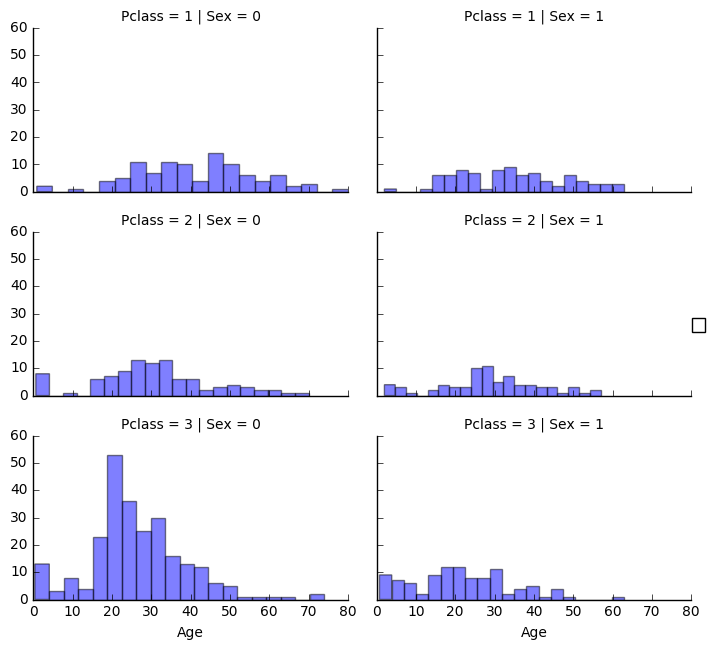

In [22]:
# Completing numerical continuous feature
# For useful numerical continuous feature, to make better use, it is necessary to solve the empty, null, nan issue
# The common methods is to generate the value according to it's associative features to miniize the introduced random noise
grid=sn.FacetGrid(tit_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [23]:
guess_ages=np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [24]:
for i in range(0,2):
    for j in range(0,3):
        guess_df = tit_data[(tit_data['Sex']==i)&(tit_data['Pclass']==j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int(age_guess/0.5+0.5) * 0.5

for i in range(0,2):
    for j in range(0,3):
        tit_data.loc[tit_data.Age.isnull()&(tit_data['Sex']==i)&(tit_data['Pclass']==j+1),'Age'] = guess_ages[i,j]


In [25]:
tit_data['Age'] = tit_data['Age'].astype(int)

In [26]:
# Given that the exact numerical value of the age is not critical for predicting Survival, create ordinal features based on age values
tit_data['AgeBand'] = pd.cut(tit_data['Age'], 5)

In [27]:
tit_data[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


In [28]:
# We could then replace age with ordinals based on the bands
tit_data.loc[tit_data['Age']<=16, 'Age']=0
tit_data.loc[(tit_data['Age'] > 16)&(tit_data['Age']<32),'Age']=1
tit_data.loc[(tit_data['Age'] > 32)&(tit_data['Age']<48),'Age']=2
tit_data.loc[(tit_data['Age'] > 48)&(tit_data['Age']<64),'Age']=3
tit_data.loc[tit_data['Age']>=64, 'Age']=4

In [29]:
tit_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [30]:
# We can now drop the Ageband feature
tit_data = tit_data.drop('AgeBand', axis=1)

In [31]:
tit_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Creating new features combining existing features

In [32]:
tit_data['FamilySize'] = tit_data['SibSp']+tit_data['Parch']+1
tit_data[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [33]:
# We can create another feature called isalone
tit_data['IsAlone']=0
tit_data.loc[tit_data['FamilySize'] == 1, 'IsAlone'] = 1

tit_data[['IsAlone','Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [34]:
tit_data = tit_data.drop(['Parch','SibSp', 'FamilySize'], axis=1)
tit_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [35]:
# We could also create an artificial feature combining Pclass and Age
tit_data['Age*Class'] = tit_data.Age*tit_data.Pclass

tit_data.loc[:,['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

In [36]:
freq_port=tit_data.Embarked.dropna().mode()[0]

In [37]:
freq_port

'S'

In [38]:
tit_data['Embarked'] = tit_data['Embarked'].fillna(freq_port)

In [39]:
tit_data[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

In [40]:
tit_data['Embarked'] = tit_data['Embarked'].map({"C":0, "Q":1, "S":2}).astype(int)
tit_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,2,1,0,3
1,1,1,1,2,71.2833,0,3,0,2
2,1,3,1,1,7.9250,2,2,1,3
3,1,1,1,2,53.1000,2,3,0,2
4,0,3,0,2,8.0500,2,1,1,6


### Quick completing  and converting a numeric feature

In [41]:
tit_data['Fare'].fillna(tit_data['Fare'].dropna().median(), inplace=True)

In [42]:
# We can now create fareband
tit_data['FareBand']=pd.qcut(tit_data['Fare'], 4)
tit_data[['FareBand','Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [43]:
tit_data.loc[tit_data['Fare'] <= 7.91, 'Fare'] = 0
tit_data.loc[(tit_data['Fare'] > 7.91)&(tit_data['Fare'] < 14.45), 'Fare'] = 1
tit_data.loc[(tit_data['Fare'] > 14.454)&(tit_data['Fare'] < 31), 'Fare'] = 2
tit_data.loc[tit_data['Fare'] > 31, 'Fare'] = 3

tit_data = tit_data.drop('FareBand', axis=1)

In [44]:
tit_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,2,1,0,3
1,1,1,1,2,3.0,0,3,0,2
2,1,3,1,1,1.0,2,2,1,3
3,1,1,1,2,3.0,2,3,0,2
4,0,3,0,2,1.0,2,1,1,6
5,0,3,0,1,1.0,1,1,1,3
6,0,1,0,3,3.0,2,1,1,3
7,0,3,0,0,2.0,2,4,0,0
8,1,3,1,1,1.0,2,3,0,3
9,1,2,1,0,2.0,0,3,0,0


### Model, predict and solve

Through understanding the problem, the issue is a supervised learning targetting for classification and regression. Among the 60+ predictive modeling algorithms, we have the following ones to choose from:
* Logistic regression
* KNN
* Support Vector Machine
* Naive Bayes Classifier
* Decision Tree
* Random Forest 
* Perceptron
* Artificial Neural Network
* RVM or Relevance Vector Machine

In [45]:
# Seperate the data into training and testing data well split the test set
tt_len = len(tit_data)
split_idx = np.random.permutation(tt_len)
train_len = int(tt_len * 0.8)
tit_train = tit_data.iloc[split_idx[:train_len]]
X_train = tit_train.drop('Survived', axis=1)
y_train = tit_train['Survived']
tit_test = tit_data.iloc[split_idx[train_len:]]
X_test = tit_test.drop('Survived', axis=1)
y_test = tit_test['Survived']

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 8), (712,), (179, 8), (179,))

### Logistic regression


In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
Y_pred = logreg.predict(X_test)

from sklearn.model_selection import cross_val_score

logreg_score = cross_val_score(logreg, X_train, y_train, cv=3, scoring="accuracy")
logreg_score

array([ 0.81932773,  0.80252101,  0.77966102])

In [49]:
logreg.coef_

array([[-0.85090324,  2.17898627,  0.01914849,  0.00277154, -0.34875075,
         0.44869319,  0.14567201,  0.00252919]])

One way to make use of logistic regresison is to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function. 

In [50]:
coeff_df = pd.DataFrame(tit_data.columns.delete(0))
coeff_df.columns = ['feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by="Correlation", ascending=False)

,feature,Correlation
1,Sex,2.178986
5,Title,0.448693
6,IsAlone,0.145672
2,Age,0.019148
3,Fare,0.002772
7,Age*Class,0.002529
4,Embarked,-0.348751
0,Pclass,-0.850903


### Support Vector Machine

In [54]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_score = cross_val_score(svc, X_train, y_train, cv=3, scoring="accuracy")
svc_score

array([ 0.85294118,  0.80252101,  0.77966102])